## Multi-Class Classification

take clustered data, classify

In [1]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [2]:
clustered = pd.read_csv('clustered/clustered_kmeans _2023-09-01 09:51:41.csv')
clustered

,Unnamed: 0,group,time,s_MP,change,type,length,sum_change,area,surge_area,...,type.1,p_MP,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,p_totalBidVol,p_totalAskVol,length.1,sum_change.1,area.1,Cluster
0,0,1,1.660222e+12,30.00,0.505364,surge,1,0.505364,0.505364,0.505364,...,precursor,29.98,-0.000618,-0.000017,-0.000210,-0.002384,6.0,-5.009518e-03,-0.030057,Cluster 2
1,1,3,1.660222e+12,29.86,0.000670,surge,1,0.000670,0.000670,0.000670,...,precursor,29.89,-0.002358,-0.000002,-0.000818,-0.000333,1.0,1.345640e-04,0.000135,Cluster 2
2,2,5,1.660222e+12,29.88,0.001273,surge,2,0.001808,0.003615,0.003615,...,precursor,29.94,0.004750,-0.000036,0.001573,-0.004835,3.0,-3.410602e-03,-0.010232,Cluster 2
3,3,7,1.660222e+12,29.80,0.000873,surge,2,0.002114,0.004229,0.004229,...,precursor,29.87,-0.000987,0.000002,-0.000398,0.000062,2.0,8.855895e-07,0.000002,Cluster 2
4,4,9,1.660223e+12,29.90,0.001305,surge,1,0.001305,0.001305,0.001305,...,precursor,29.95,0.001531,0.000010,0.000334,0.001094,7.0,-1.377036e-02,-0.096393,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,5632,11265,1.693072e+12,10.02,0.109437,surge,1,0.109437,0.109437,0.109437,...,precursor,10.02,-0.320042,0.404540,1.149854,0.520527,5.0,-2.839127e-01,-1.419563,Cluster 3
5633,5633,11267,1.693073e+12,10.02,0.000599,surge,1,0.000599,0.000599,0.000599,...,precursor,10.03,0.004809,0.000779,0.001181,0.003685,5.0,-4.980070e-04,-0.002490,Cluster 3
5634,5634,11269,1.693073e+12,10.03,0.000898,surge,1,0.000898,0.000898,0.000898,...,precursor,10.03,-0.000989,-0.000484,-0.000248,-0.002320,15.0,-1.694517e-03,-0.025418,Cluster 3
5635,5635,11271,1.693076e+12,10.02,0.000699,surge,1,0.000699,0.000699,0.000699,...,precursor,10.02,0.006274,-0.001249,0.001518,-0.005973,5.0,-1.990038e-04,-0.000995,Cluster 3


In [3]:
clustered.drop(['group', 'time', 's_MP', 'change', 'type', 'length', 'sum_change', 'surge_area' ] , axis=1, inplace=True) 
clustered

,Unnamed: 0,area,group.1,time.1,change.1,type.1,p_MP,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,p_totalBidVol,p_totalAskVol,length.1,sum_change.1,area.1,Cluster
0,0,0.505364,2.0,1.660222e+12,-0.000533,precursor,29.98,-0.000618,-0.000017,-0.000210,-0.002384,6.0,-5.009518e-03,-0.030057,Cluster 2
1,1,0.000670,4.0,1.660222e+12,0.000135,precursor,29.89,-0.002358,-0.000002,-0.000818,-0.000333,1.0,1.345640e-04,0.000135,Cluster 2
2,2,0.003615,6.0,1.660222e+12,-0.000233,precursor,29.94,0.004750,-0.000036,0.001573,-0.004835,3.0,-3.410602e-03,-0.010232,Cluster 2
3,3,0.004229,8.0,1.660222e+12,-0.000502,precursor,29.87,-0.000987,0.000002,-0.000398,0.000062,2.0,8.855895e-07,0.000002,Cluster 2
4,4,0.001305,10.0,1.660223e+12,-0.000768,precursor,29.95,0.001531,0.000010,0.000334,0.001094,7.0,-1.377036e-02,-0.096393,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,5632,0.109437,11266.0,1.693073e+12,-0.283913,precursor,10.02,-0.320042,0.404540,1.149854,0.520527,5.0,-2.839127e-01,-1.419563,Cluster 3
5633,5633,0.000599,11268.0,1.693073e+12,0.000399,precursor,10.03,0.004809,0.000779,0.001181,0.003685,5.0,-4.980070e-04,-0.002490,Cluster 3
5634,5634,0.000898,11270.0,1.693073e+12,0.000000,precursor,10.03,-0.000989,-0.000484,-0.000248,-0.002320,15.0,-1.694517e-03,-0.025418,Cluster 3
5635,5635,0.000699,11272.0,1.693076e+12,0.000000,precursor,10.02,0.006274,-0.001249,0.001518,-0.005973,5.0,-1.990038e-04,-0.000995,Cluster 3


In [4]:
#setup 
from pycaret.classification import *
s = setup(clustered, target = 'Cluster', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3"
4,Original data shape,"(5637, 15)"
5,Transformed data shape,"(5637, 15)"
6,Transformed train set shape,"(3945, 15)"
7,Transformed test set shape,"(1692, 15)"
8,Numeric features,13
9,Categorical features,1


In [5]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [6]:
type(exp)


pycaret.classification.oop.ClassificationExperiment

In [7]:
exp.setup(clustered, target = 'Cluster', session_id = 42)


,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3"
4,Original data shape,"(5637, 15)"
5,Transformed data shape,"(5637, 15)"
6,Transformed train set shape,"(3945, 15)"
7,Transformed test set shape,"(1692, 15)"
8,Numeric features,13
9,Categorical features,1


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9997,1.0000,0.9997,0.9997,0.9997,0.9997,0.9997,0.1770
xgboost,Extreme Gradient Boosting,0.9997,0.9999,0.9997,0.9997,0.9997,0.9997,0.9997,0.2010
knn,K Neighbors Classifier,0.9995,0.9998,0.9995,0.9995,0.9995,0.9993,0.9993,0.0640
dt,Decision Tree Classifier,0.9995,0.9997,0.9995,0.9995,0.9995,0.9993,0.9993,0.0560
gbc,Gradient Boosting Classifier,0.9995,0.9997,0.9995,0.9995,0.9995,0.9993,0.9993,1.1490
rf,Random Forest Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9990,0.9990,0.2300
lightgbm,Light Gradient Boosting Machine,0.9980,0.9999,0.9980,0.9980,0.9980,0.9973,0.9973,321.7380
nb,Naive Bayes,0.9944,1.0000,0.9944,0.9946,0.9944,0.9926,0.9926,0.0530
lda,Linear Discriminant Analysis,0.9539,0.9959,0.9539,0.9605,0.9540,0.9384,0.9407,0.0570
ridge,Ridge Classifier,0.9171,0.0000,0.9171,0.9359,0.9159,0.8894,0.8968,0.0490


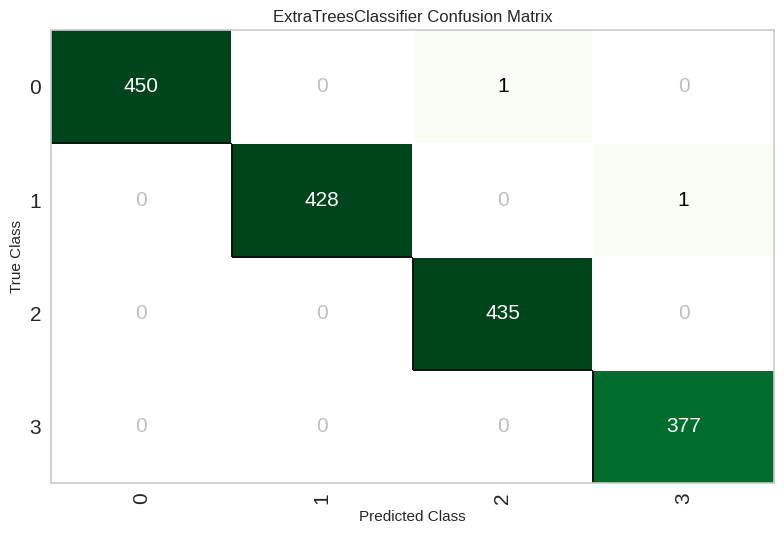

In [9]:
plot_model(best, plot = 'confusion_matrix')

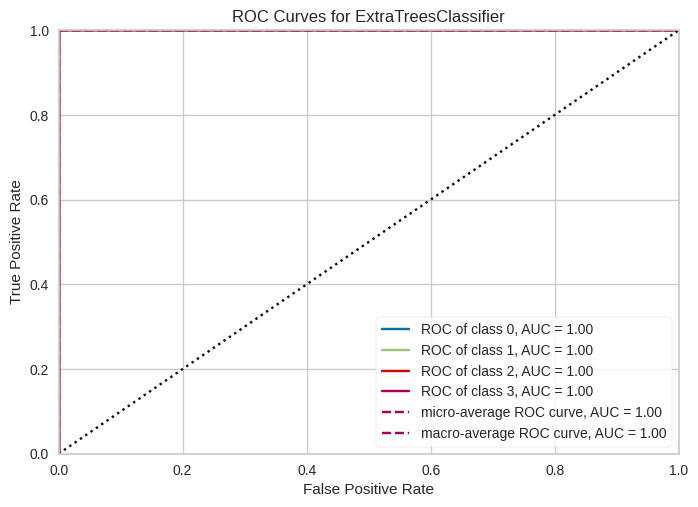

In [10]:
plot_model(best, plot = 'auc')


In [11]:
# plot_model(best, plot = 'efficiency')
# # 

In [12]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9988,1.0000,0.9988,0.9988,0.9988,0.9984,0.9984


In [14]:
holdout_pred.head()


,Unnamed: 0,area,group.1,time.1,change.1,type.1,p_MP,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,p_totalBidVol,p_totalAskVol,length.1,sum_change.1,area.1,Cluster,prediction_label,prediction_score
2048,2048,0.118710,4098.0,1.670934e+12,-0.002651,precursor,13.10,-0.013676,-0.001794,-0.009614,-0.009159,1.0,-0.002651,-0.002651,0,Cluster 0,1.0
1903,1903,0.020815,3808.0,1.670066e+12,-0.001773,precursor,13.44,0.000304,0.000039,0.000738,0.004671,1.0,-0.001773,-0.001773,0,Cluster 0,1.0
381,381,0.011330,764.0,1.662057e+12,-0.002178,precursor,18.77,-0.002692,-0.000025,-0.001252,-0.004820,1.0,-0.002178,-0.002178,2,Cluster 2,1.0
2507,2507,0.001495,5016.0,1.673568e+12,-0.005057,precursor,15.39,0.003231,-0.002758,0.001327,-0.009749,1.0,-0.005057,-0.005057,0,Cluster 0,1.0
2524,2524,0.004474,5050.0,1.673627e+12,0.000261,precursor,15.51,0.001741,-0.002361,0.000180,-0.009540,1.0,0.000261,0.000261,0,Cluster 0,1.0


### loading a model

In [15]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [16]:
# functional API
# loaded_model = load_model('iforest_pipeline')
# print(loaded_model)

# OOP API
# loaded_model = s.load_model('kmeans_pipeline')
# print(loaded_model)